# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko


 * [Numpy,Scipy,Scikit-image를 통한 기본 영상 처리1](#Numpy,Scipy,Scikit-image를-통한-기본-영상-처리1) 
      * [ Matlab vs Numpy](#Matlab-vs-Numpy)
           * [ Matlab](#Matlab)
           * [ Numpy](#Numpy)
             * [영상처리에서의 Numpy](#영상처리에서의-Numpy )
             * [Numpy 데이터 구조](#Numpy-데이터-구조)
             * [데이터 저장방식](#데이터-저장방식)
          * [Image](#Image)
              * [Image 형태:bitmap ,vector](#Image-형태)
              * [Image 차원](#Image-차원)
              * [데이터셋 구성 ](#데이터셋-구성 )
                  * [NHWC format](#NHWC-format )
              * [channel](#channel )
                  * [색상 Image](#색상-Image)
                  * [흑백 Image](#흑백-Image)      
---

## Numpy,Scipy,Scikit-image를 통한 기본 영상 처리1

numerical computing
- 해석학:  미적분
- 선형대수: 벡터,행렬 -> numpy

## Matlab vs  Numpy
### Matlab
- 컴퓨터로 연산은 비용이 많이 들었었어서 공학자나 전문가를 위한 방식으로 효율적으로 빠른 연산을 하는게 목적 
- 10년 전만해도 이미지 처리, 그래픽스 또한 숫자로 연산함 MATLAB이 대세
    - open source version: Octave
    - domain specific
    - Matlab은 상용이기 때문에 소스 코드를 알 수 없어서 자체 기능을 바꿀수 없고 주어진 것으로 사용

### Python     
> "I was a fairly proficient MATLAB user, but it was not memory efficient enough."
                                                - Travis Oliphant -

- copy(deep copy)를 만들지 않는 Slicing
   - seqeunce 는 indexing, slicing 제공
- general purpose 이기 때문에 가능
- open source
   - MatPlotlib:  Matlab 과 동일한 방식으로 plotting 가능

Python 의 단점
1. 속도가 느리다 
2. mobile 지원 부족

### Numpy
- Matlab 의 약점을 극복하기 위해 만든것
- 연산(computing)은 속도가 중요하여 속도를 높이기 위해서 다양한 시도가 있었음
- 기본적인거 다 갖추어져 있어 가져다 쓰기만 하면 됨

Python의 단점 보완 방법
1. 하드웨어 
    - computing power: GPU, Multi Processor, Prallel Computing 

2. Compiler(language) 바꿈 
    - Cython(C + Python): C만큼 속도가 빠름
        - 일반적인 pythong 코드와 완벽히 호환이 안 되어 코드 수정이 필요
        - C 에대한 지식도 필요
    - Pythran(Python+Fortran)
    - PyPy(Pyton+Python): 파이썬 자체로 만든 병목현상 부분을 제거하여  속도가 빠른 파이썬 만듦    
 
3.  glue language(library) 특성 
    - 현재 사용하는것은 C로 만든 python 이기 때문에 C와 잘 붙기 때문에 병목현상이 있는 부분만  C로 만들어 해결하면 5~100배 빠름
    - 내부적으로 C 로 만드는 API https://docs.python.org/ko/3/c-api/index.html

4. algorithm / 데이터 구조
    -  같은 문제라도 효율성 차이가 큼
    -  `ndarray` 라는 효율적인 자료 구조


- numpy에 property가 많은 이유
    - descriptor 방식을 이용해서 객체의 get,set,del 과 같은 기본 연산을 관리
    - 가져다가 쓰면 다양한 데이터 타입을 facade 방식으로 관리하기 쉽기 떄문에 많음
        - facade : 클래스 라이브러리 같은 어떤 소프트웨어의 다른 커다란 코드 부분에 대한 간략화된 인터페이스를 제공하는 객체

### Numpy 단점

1. GPU 지원 하지않음(딥러닝에서는 중요한 사항)
    - multi-processor 만 지원하는 이유는 특정 회사에 종속되기 때문
    - Python, TesnsorFlow는 NVIDIA의 cuda를 지원하는 GPU 만 지원
    - 복잡도가 증가함..

2. Modern하지 못함(우아)
    - 체계적이지 못 함
    - mutable data type 사용
        - mutable 이 편하지만 데이터의 값이 바뀔수 있기 때문에 코드의 흐름을 망칠 수 있음
        - functional paradigm에서 immutable 사용하는 이유
    - 중복되는 기능이 많음
    - pytorch 공식문서에서는 modern 하지 못하다함.
        - 참고 : https://pytorch.org/tutorials/beginner/pytorch_with_examples.html


### Numpy 장점

1. 쉽고 편리하고 빠르다 (GPU 사용 안 한다고 고려한 경우)
    - 전문가들을 위한 tool이기 때문에 미묘한 차이를 구분해 놓음 (장점이자 단점)
    - broadcasting, ufunc(universal function)
2. vector, matrix 기반 element-wise 기반으로 vectorization 
    -  Numpy 외에 대안이 없음 

### 영상처리에서의 Numpy
- 단점 때문에 google 에서는 tf에서는 tensor 라는 구조를 만들고 FB(Facebook)에서는 pytorch에 tensor라는 구조 만듦.
- Numpy는 딥러닝 외에 다른 분야에서도 **방대한** 기능 제공하기 때문에 핵심적인 기능 외에 부가적인 이미지 처리를 numpy로 사용 
    - scipy를 이용해서 영상처리 
    - 기본적으로 이미지는 matrix, tensor로 표현할 수 있음
    - Numpy기반으로 전처리 
 
#### Numpy 데이터 구조
1. array
     - array: 데이터 구조
     - vector: 1차원, matrix: 2차원, tensor : 3차원 이상
2. matrix
3. masked array
    - 있다고만 언급
4. structured array

In [1]:
import numpy as np

In [2]:
a= np.array([1,2,3])
a # ndarray 타입

array([1, 2, 3])

In [3]:
type(a)

numpy.ndarray

In [4]:
a@a #행렬 곱(내적)

14

In [5]:
b=np.mat([[1,2],[3,3]])
b #matrix 타입

matrix([[1, 2],
        [3, 3]])

In [6]:
type(b)

numpy.matrix

### ndarray
 - n차원 array(n-dimensional array)  



In [7]:
np.ndarray #Init signature -> class

numpy.ndarray

In [8]:
type(np.ndarray)

type

In [9]:
np.ndarray.__class__

type

`__array__ ,__array_interface__,__array_wrap__`: Numpy와 호환 가능 (Keras 에서 추후 다룸)

In [19]:
dir(np.ndarray) #__array__ ,__array_interface__,__array_wrap__ Numpy와 호환됨

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

#### method_descriptor
- 디스크립터로 var과 연동시키는 method를 기본적으로 만들어 놓아서 다른 프레임워크보다 property 가 많은 이유

`np.ndarray.var`
- 주어진 axis에 따라서 numpy의  ndarray의 원소들의 분산을 구함

In [23]:
np.ndarray.var # method 

<method 'var' of 'numpy.ndarray' objects>

In [24]:
type(np.ndarray.var) #method_descriptor -> 메소드 자체를 디스크립터로 만듦

method_descriptor

In [11]:
np.ndarray.var(a),np.ndarray.var(b) #분산

(0.6666666666666666, matrix([[0.6875]]))

In [15]:
np.ndarray.std(a)*np.ndarray.std(a), np.ndarray.std(b)*np.ndarray.std(b) #편차의 제곱은 분산

(0.6666666666666666, matrix([[0.6875]]))

공통적으로 알아야 할 attributes 만 출력
 - `_`로 시작하지 않음
 - type이 method_descriptor 가 아님

In [16]:
for i in dir(np.ndarray): 
    if not i.startswith('_'):   #_로 시작하지 않음
        if type(np.ndarray.var)!=type(np.ndarray.__dict__[i]): #디스크립터 제외
            print(i)

T
base
ctypes
data
dtype
flags
flat
imag
itemsize
nbytes
ndim
real
shape
size
strides


In [17]:
import tensorflow as tf
c=tf.constant([1,2,3])
c  # shape, dtype 가장 중요

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

#### dtype : 
-  이미지 자체의 숫자 범위가 있기 때문에 영상 처리에서는 dtype 을 몇 개 안 씀
    - i8, f4,f32
    
#### shape 
- 벡터, 메트릭스 연산의 기본 선행 조건
> - scikit은 알아서 맞추어 주었지만 Keras에서는 shape을 꼭 맞추어 주어야함
  - 첫 번째 레이어의 input_shape, 마지막 레이어 output(regression, classification(bi/multi...)

In [12]:
a.shape, a.dtype

((3,), dtype('int64'))

In [16]:
b,  b.T #행렬 전치되었음

(matrix([[1, 2],
         [3, 3]]),
 matrix([[1, 3],
         [2, 3]]))

In [23]:
type(a).__bases__ # 부모 클래스 찾을때

(object,)

- ctypes
    - 속도를 높이기 위해 hardware, glue language를 c에 `ctypes` module 이용하여 연동하기 때문에 c의 데이터 타입 확인
- real 실수 (real number)
- imag 허수(imaginary number)

In [20]:
b.ctypes

shape, dtype 알면 나머지 유추가능

In [27]:
b.shape 

(2, 2)

In [28]:
b.size #원소 갯수 = 행x 열= 2x2=4개원소

4

In [29]:
b.ndim #2차원

2

In [30]:
b.dtype   #system 마다 다름; mac 64나옴

dtype('int64')

In [31]:
b.itemsize #64/8bits=8byte ( 1byte= 8bits)

8

In [32]:
b.nbytes  #itemsize 8이  총 4개있음  총 32

32

python 숫자형 
1. int 정수
2. float 실수
3. bool 불대수
4. complex 복소수

In [44]:
type(1), type(True), type(1.0), type(1+0j)

(int, bool, float, complex)

In [ ]:
c=np.array #shift+tab 

> 작곡가 Ravel의 대표곡 Bolero 감상: https://www.youtube.com/watch?v=mhhkGyJ092E 
    - 라벨의 대표곡 볼레로 -> ㅂ..뷰
        - ravel - 뷰
        - tf의 flatten - copy기법        

In [4]:
b=np.array([[1,2,3],[4,5,6]]) #2차원
b.ndim #내부적으로는 다 1차원

2

In [5]:
b.flat  #flatiter -> ..iter!

In [33]:
dir(b.flat) # __next__ 

['__array__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'base',
 'coords',
 'copy',
 'index']

- numpy 는 내부적으로 다 1차원이며 stride 이용하여 n 차원으로 표현 

In [34]:
b

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
next(b.flat) 

1

In [8]:
list(b.flat) #원래의 1차원으로 만들어줌

[1, 2, 3, 4, 5, 6]

- dtype, shape 이 제일 중요!!!
    - 첫,마지막 레이어 맞춰주면 행렬 곱셈의 특징 때문에 내부 자동으로 맞추어줌 

### data
- 주어진 객체를 참조하는 메모리 번지

In [9]:
b.data  #첫번째 메모리 번지

In [10]:
dir(b.data) #obj- 복잡하게 관리

['__class__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'c_contiguous',
 'cast',
 'contiguous',
 'f_contiguous',
 'format',
 'hex',
 'itemsize',
 'nbytes',
 'ndim',
 'obj',
 'readonly',
 'release',
 'shape',
 'strides',
 'suboffsets',
 'tobytes',
 'tolist']

In [38]:
b.data.obj #데이터 안에 object 관리

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
b

array([[1, 2, 3],
       [4, 5, 6]])

객체를 repr, str 로 호출할 때와 비슷

### __repr__ 
-  객체 호출시에 호출됨

### __str__  
- print 로 객체 호출할때 

In [59]:
class X:
    def __repr__(self):
        return('객체 호출시')
    def __str__(self):
        return('print 로 객체 호출')

In [60]:
x=X()

In [61]:
x # __repr__

객체 호출시

In [62]:
print(x)  

print 로 객체 호출


In [63]:
b.data.obj  #__repr__

array([list([1, 2, 3]), list([4.5, 6])], dtype=object)

In [66]:
print(b)   #__str__

[list([1, 2, 3]) list([4.5, 6])]


## 데이터  저장방식

### strides
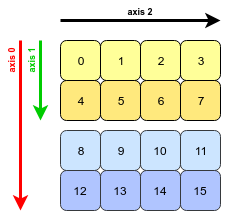
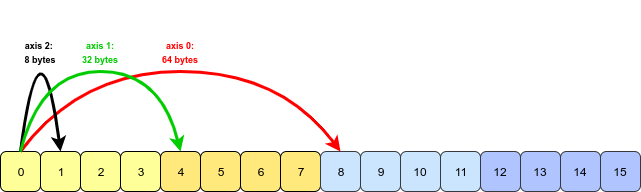
- contiguous block of memory : 1차원으로 **C contiguous array(행중심)** 형태로 저장되어있음
- 메모리에서 다음 값으로 넘어가기위해 필요한 byte 갯수
- 각 행 담긴 원소 갯수를 곱하면 됨.(예. 1번째 열: 4개 x 8bytes=32) ㅣ 
- 참고: https://stackoverflow.com/questions/32034237/how-does-numpys-transpose-method-permute-the-axes-of-an-array?rq=1

In [36]:
b

matrix([[1, 2],
        [3, 3]])

In [35]:
b.strides #일렬로 저장되어있는 것을 스트라이드로 모양을 변신시킴

(16, 8)

### flags
- 해당 array의 메모리 레이아웃에대한 정보  
    - C_CONTIGUOUS: 내부적으로 데이터 저장할때 C 방식( 행중심)
    - F_CONTIGUOUS:  내부적으로 데이터 저장할때 F 방식(열중심)

In [37]:
b.flags # C_CONTIGUOUS방식

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

 넘파이 속도가 빠른이유 중 하나인 효율적인 자료구조 

- `order : {'K', 'A', 'C', 'F'}, optional
- C 방식, Fortran F방식, 변환을 시킬것인지 아닌지에 따라 데이터 저장방식을 사용 가능
    - 해당 수업에서는 C 방식만 사용
-  효율적 자료구조가 잘 되어있어 pytorch tesnfor, tf tensor 도 동일한 구조

하드웨어 성능
-  CPU는 자체에서 vectorization 기능 지원
  
## vectorization
- **loop 없이 동시에 여러개를 연산을 해주는 기법** 
    - for 는 전체에서 하나씩 뽑아서 처리 하기때문에 속도가 느림
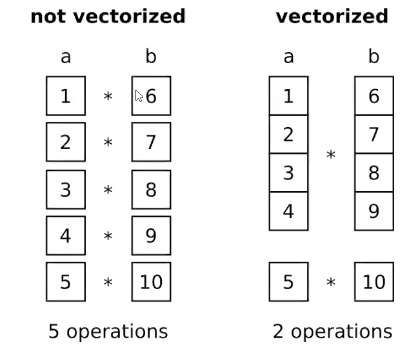
- 쿼드코어(Quad-core):CPU에 4개의 core가 독립적으로 동시에 실행
    - 4개가 독립적으로 한 cpu 지원하기 때문에 벡터를 동시에 지원하는 만큼 한번에 계산하여 속도적으로 CPU 효율적 관리

In [73]:
[1,2,3]+[4,5,6] #단순히 합침

[1, 2, 3, 4, 5, 6]

In [75]:
#Numpy : element-wise (각 동일한 위치의 원소끼리)방식으로 계산-> vectorization
x=np.array([1,2,3])
y=np.array([4,5,6])
x+y  

array([5, 7, 9])

In [74]:
#Python : for loop 이용하여 하나하나 더함
t=[1,2,3]
s=[4,5,6]
tmp=[]
for i,j in zip(t,s):
    tmp.append(i+j)
tmp

[5, 7, 9]

속도 차이가 엄청 남을 알 수 있음

In [76]:
#python: for loop 속도가 느림
%%timeit
t=range(10000)
s=range(10000)
tmp=[]
for i,j in zip(t,s):
    tmp.append(i+j)

1.45 ms ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [78]:
#Numpy: vectorization으로  element-wise 방식으로 계산한것 훨씬 빠름
%%timeit
x=np.arange(10000)
y=np.arange(10000)
x+y

19.3 µs ± 897 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### GPU
- 많을수록 vectorization 동시에 해줄수 있는게 많아 빨라지나 그만큼 비쌈 
- GPGPU(General Purpose GPU) - 게임용도가 아닌 연산, 연구 용
    - AMD: OpenCL 표준을 GPU 기능 통해서 지원하나 성능이 좋지 않고 버전업 문제 있음
         - 사용자들이 변형해서 비공식으로 amd gpu 지원해주긴 하지만 완벽한 성능은 안나옴
#### cuda processor 
- NVIDIA 자체 cuda 이용: 기본적인 딥러닝에서는 우선적으로 지원
- TensorFlow 공식 홈페이지 설치 : `GPU 지원은 CUDA 지원 카드가 있는 Ubuntu 및 Windows에 제공됩니다.`

In [ ]:
#사용 가능한 자원 목록
tf.config.experimental.list_logical_devices()

In [ ]:
tf.config.experimental.list_physical_devices()

- pytorch 는 하나하나 지정 가능하여 우아함 (예. `torch.cuda` )
- tf 2.0 부터는 keras 가 편하게 사용은 가능하지만 모든것을 customizing 은 힘듦



#### Data Structure
- 1 열 배열
- sequence 타입으로 만듦
    - indexing, slicing  지원
- **homogeneous**: 한가지 데이터 타입 
    - header에 dtype이 일정하여 체크할 필요가 없어 속도가 빠름
- descriptor 기반으로 만들어 property가 많을 수 밖에 없음


block of memory + indexing scheme + data type descriptor
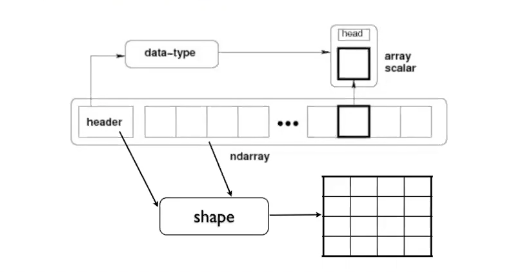

In [79]:
a= np.array([1,'1',2,3,])

In [80]:
a  #type casting -> 메모리 큰 것으로 변경해줌  

array(['1', '1', '2', '3'], dtype='<U11')

## Image
- 왜 영상 처리에서 array programming 이 중요한지
### Image 형태
image는 2가지 형태의 format
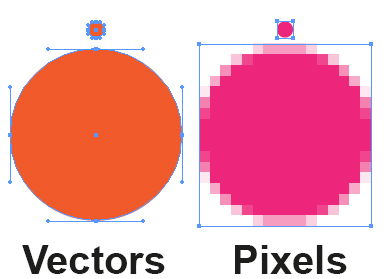
- vector 
    - 이미지의 형식을 수식을 이용해서 오브젝트 만듦
        - ( 점(Anchor/point)연결하여 선(path), 선열결하여 면)
    - 이미지 확대,축소하여도 해상도에 영향 주지 않음
    - 사진과 이미지 같은 정교한 그래픽 표현에는 한계
    - 예. AI, PDF, SVG
- bitmap(map of bits)
    - Raster graphics: 점 하나(Pixel)를 별도로 독립적으로 처리하여 축소,확대하면 품질 저하됨
    - 많은 픽셀로 정교하고 다양한 색상을 가진 이미지를 만들 수 있음
    -  bitmap방식이면 이미지 자체를  matrix/ tensor 로 인식
    - 예. JPG, JPEG, PNG, GIF
 

공백 : matrix 기반으로 구분함
- numpy는 matlab에서는 matrix 가 기본적인 타입으로 따름

In [82]:
a=np.arange(24).reshape(2,3,4)
a  #  3x4 matrix 2개 

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [84]:
a.ndim

3

In [85]:
print(a)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


### mnist
-  0~9까지 숫자 손글씨의  흑백 이미지

In [14]:
(X_train,y_train),(X_trest,y_test)= tf.keras.datasets.mnist.load_data() #holdout

In [15]:
X_train.shape #28x28 matrix가 60,000개 

(60000, 28, 28)

In [16]:
X_train  # 공백으로 구분함

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Image 차원
- BW : 1차원,2차원 
    - 보통 흑백이미지는 2차원으로 관리하는 경우가 많음
- RGB: 3 차원
    -  0~255사이의 값을 갖는 값들이 RGB 이미지로 표현 하였을때 2차원 매트릭스가 3장(tensor) 겹친것


차원의 저주: 차원이 증가할수록 필요한 데이터 양이 기하급수적으로 증가함
  - 해결하기 위해서 차원을 줄여서 해결
- 차원 증가는 아무 문제가 없음

아래 x, xx는 차원 차이만 있음

In [91]:
x=np.array([1,2,3,4])    #1차원 벡터
xx=np.array([[1,2,3,4]]) #2차원 메트릭스

In [92]:
x[np.newaxis] #차원 추가 

array([[1, 2, 3, 4]])

In [93]:
x.reshape(1,4)#차원 추가 

array([[1, 2, 3, 4]])

In [87]:
x.shape, xx.shape  #동일한 값 차원만 다름

((4,), (1, 4))

In [19]:
X_train[0].shape #2차원

(28, 28)

In [18]:
X_train_= X_train[0].reshape(28,28,1) #3차원 : 차원 하나 추가 
X_train_.shape

(28, 28, 1)

#### array programming
- 이미지 갯수, 이미지 크기, 색상 정보를 이용해서 이미지를 matrices로 표현
- 자체가 복잡한 연산을 처리하기 때문에 computing power 가 중요하여 numpy 가 제격
- 영상처리에 중요한데 데이터 타입 자체는 색상 정보에 많이 따라감

- array programming 의 좌표축은 좌측 최 상단을 (0,0) 기준으로 하면 행렬 : 벡터가 1:1 매칭이 가능해져서 수학적 개념 사용 가능

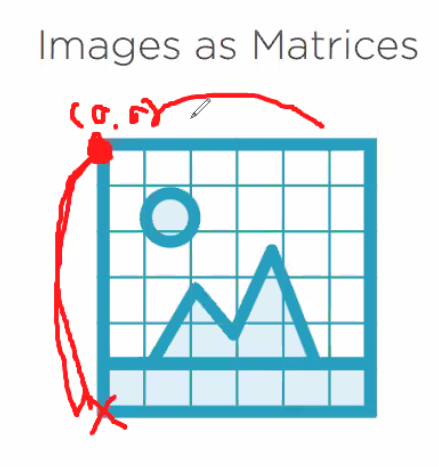
> - 영상처리에서 배웠던 CNN 에서 convolution 도 (0,0) 에서 시작
## 데이터셋 구성 

### NHWC format
- NCHW (channel first)
- NHWC(channel last) 
    - n개의 세로(height),가로(width)가 채널(channel)을 갖는 이미지
- NHW 
    - n개의 세로(height),가로(width)의 이미지
    
## channel
### 색상 이미지 
- 색상 표현하는 방식은 다양: cymk,rgb,hsv
- 모두 색상 정보 포함하는 각 channel 을 겹쳐서 하나로 표현함

#### RGB format
- intensity : 0~255 
    - 화소의 밝은 정도(세기) 
    - 2^8=256개로 메모리 효율적으로 관리 가능
- channel : Red, Green,Blue
    - 색상 정보에 따라서 데이터 타입 결정
    - 무조건 RGB가 아니라 BGR (openCV)로도 표현함
        - 예. RGB의 빨강색 = [255,0,0] = BGR의 파랑색
        - 예. RGB의 초록색 = [0,255,0]= BGR의 초록색
        - 예. RGB의 파랑색 = [0,0,255]= BGR의 빨강색

#### RGBA
- alpha channel :투명도
    - 0~1 사이 값

영상에 따라서 여러 format 이다르기 때문에 d-type 확인

### 흑백 Image
- 1차원,2차원 으로 표현 가능
- 흑백이미지는 상대적인 크기로 이미지를 표현하기 때문에 큰 차이가 없음
#### intensity 
- 화소의 밝은 정도(세기)로 흑백이미지는 상대적인 크기
    - 0~1
    - 0~255 (2의 8승)
    - 0~65,535(2의 16승)

이미지는 행렬로 표현하지만 표현 방식은 다양하여 어떻게 표현됬는지 dtype, shape확인
- 예. (60000, 28,28,3) 보통 chanel 은 1~4차원 사이이기 때문에 유추 쉬움
- mnist는 0~255사이의 값을 갖음

In [20]:
X_train.dtype

dtype('uint8')

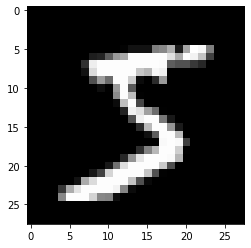

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='gray') #matplotlib은 color정보 없으므로 colormap 지정

- MinMaxScaling
     - 0~1 사이 값을 갖도록 하기 위해 표준화함
     - 신경망 태생이 0~1사이값을 받도록 되어있음

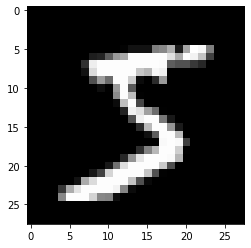

In [24]:
plt.imshow(X_train[0]/255,cmap='gray')